## Demo notebook, pyeyesim library

this notebook is for testing and developing the PyEyeSim library for eye-movement comparison for looking at static images 

test with dependencies:
- xarray: 0.19.0
- pandas: 1.3.2
- numpy: 1.20.3
- matplotlib: 3.4.2
- scipy: 1.7.1 


### Import dependencies

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from scipy import stats


### import PyEyeSim library

In [171]:
from PyEyeSim import pyeyesim as pysim


for development: changes should load automatically

In [172]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##  Set file path and load data file 

In [176]:
MemoryStudy=0
GenderStudy=1
Mac=0
if GenderStudy:
    if Mac:
        Filepath='/Volumes/GoogleDrive/My Drive/Vienna/CreaLab/GenderProject/GenderIIFemalePaint.csv'
    else:
        Filepath='C:\\Users\\aratoj87\\Google Drive\\Vienna\\CreaLab\\GenderProject\\GenderIIFemalePaint.csv'
    
    sizeX=2560
    sizeY=1600
     #StimN='Pa'
if MemoryStudy:

    if Mac:
        Filepath='/Users/jarato/Documents/EyeTracking/MemoryStudyFix.csv'
    else:
        Filepath='C:\\Users\\aratoj87\\Documents\\EyeTracking\\WilmKonigDatabase\\MemoryStudyFix.csv'
    sizeX=1280
    sizeY=960


FixData=pd.read_csv(Filepath)
if MemoryStudy:
    FixData=FixData[FixData['Repetition']==1]
   # StimN='Stimulus'


#
#fixData=pd.read_csv(Filepath)
FixData

,Unnamed: 0,Unnamed: 0.1,subjectID,Number,GazePoints,mean_x,mean_y,radius,Cluster,Painting,PartGend,Gaze Points,Radius
0,0,0,G_001,1.0,30.0,1231.0,860.0,19.9396,0.0,Bellini_Halbakt,Male,NaN,NaN
1,1,1,G_001,2.0,13.0,1242.0,412.0,25.8158,0.0,Bellini_Halbakt,Male,NaN,NaN
2,2,2,G_001,3.0,20.0,1255.0,419.0,37.4225,0.0,Bellini_Halbakt,Male,NaN,NaN
3,3,3,G_001,4.0,31.0,1270.0,440.0,25.6350,0.0,Bellini_Halbakt,Male,NaN,NaN
4,4,4,G_001,5.0,48.0,1045.0,751.0,37.7525,0.0,Bellini_Halbakt,Male,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51610,28411,3714,P74_VF,74.0,36.0,823.0,656.0,23.1638,0.0,Wittmann_Selbstbildnis,Female,NaN,NaN
51611,28412,3715,P74_VF,75.0,22.0,850.0,658.0,20.8895,0.0,Wittmann_Selbstbildnis,Female,NaN,NaN
51612,28413,3716,P74_VF,76.0,14.0,828.0,668.0,27.6424,0.0,Wittmann_Selbstbildnis,Female,NaN,NaN
51613,28414,3717,P74_VF,77.0,17.0,825.0,659.0,28.2337,0.0,Wittmann_Selbstbildnis,Female,NaN,NaN


set size of stimulus in pixels (if same for all)

## Example dataset 1


In [175]:
MyMemoryDat=pysim.EyeData('MemoryStudy','Within',FixData,sizeX,sizeY)


Fixation dataset MemoryStudy
dataset size:  (33806, 8)
study design:  Within
presentation size:  x= 1280 pixels y= 960  pixels
presentation size:  x= 1280 pixels y= 960  pixels
column found:  StimName  default:  Stimulus
column found:  SubjName  default:  subjectID
column found:  mean_x  default:  mean_x
column found:  mean_y  default:  mean_y
info found for 45 subjects, and 48 stimuli
Stim path not provided


### load data and provide info fixation duration column 

In [ ]:
MyMemoryDat.DataInfo(FixDuration='length')

## Example dataset 2

In [177]:

MyGenderDat=pysim.EyeData('GenderStudy','Between',FixData,sizeX,sizeY)



Fixation dataset GenderStudy
dataset size:  (51615, 13)
study design:  Between
presentation size:  x= 2560 pixels y= 1600  pixels
presentation size:  x= 2560 pixels y= 1600  pixels
StimName  not found !!, provide column as .DataInfo(StimName='YourColumn') default Stimulus
column found:  SubjName  default:  subjectID
column found:  mean_x  default:  mean_x
column found:  mean_y  default:  mean_y
info found for 56 subjects, and 12 stimuli
stimuli loaded succesfully, access as self.images


## provide info on stimulus path

In [196]:
Path='C:\\Users\aratoj87\Documents\ArtHistory\GenderProject\Gender II_StudyDesign_Images\Female Paintings'
MyGenderDat.DataInfo(StimName='Painting',StimPath=Path,StimExt='.jpg')


info found for 56 subjects, and 12 stimuli
stimuli loaded succesfully, access as self.images


In [179]:
MyGenderDat.data

,Unnamed: 0,Unnamed: 0.1,subjectID,Number,GazePoints,mean_x,mean_y,radius,Cluster,Stimulus,PartGend,Gaze Points,Radius
0,0,0,G_001,1.0,30.0,1231.0,860.0,19.9396,0.0,Bellini_Halbakt,Male,NaN,NaN
1,1,1,G_001,2.0,13.0,1242.0,412.0,25.8158,0.0,Bellini_Halbakt,Male,NaN,NaN
2,2,2,G_001,3.0,20.0,1255.0,419.0,37.4225,0.0,Bellini_Halbakt,Male,NaN,NaN
3,3,3,G_001,4.0,31.0,1270.0,440.0,25.6350,0.0,Bellini_Halbakt,Male,NaN,NaN
4,4,4,G_001,5.0,48.0,1045.0,751.0,37.7525,0.0,Bellini_Halbakt,Male,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51610,28411,3714,P74_VF,74.0,36.0,823.0,656.0,23.1638,0.0,Wittmann_Selbstbildnis,Female,NaN,NaN
51611,28412,3715,P74_VF,75.0,22.0,850.0,658.0,20.8895,0.0,Wittmann_Selbstbildnis,Female,NaN,NaN
51612,28413,3716,P74_VF,76.0,14.0,828.0,668.0,27.6424,0.0,Wittmann_Selbstbildnis,Female,NaN,NaN
51613,28414,3717,P74_VF,77.0,17.0,825.0,659.0,28.2337,0.0,Wittmann_Selbstbildnis,Female,NaN,NaN


Data for  56 observers and  12  stimuli.
Mean fixation number:  76.81  +/-  11.44
fixation duration not asked for
Num of trials with zero fixations: 1
Num valid trials  671
Mean X location:  1302.5  +/-  53.0  pixels
Mean Y location:  771.5  +/-  78.3  pixels


(array(['Bellini_Halbakt', 'Bouguereau_JungeFrau', 'Cranach_Venus',
        'David_Recamier', 'Gentileschi_Maria', 'Goya_MajaAngezogen',
        'Goya_MajaNacht', 'Ingres_Odaliske', 'Spiro_Halbakt',
        'Valadon_Selbstbildnis', 'VanLoo_JungeFrau',
        'Wittmann_Selbstbildnis'], dtype=object),
 array(['G_001', 'G_002', 'G_003', 'G_004', 'G_006', 'G_007', 'G_009',
        'G_010', 'G_011', 'G_014', 'G_016', 'G_017', 'G_019', 'G_020',
        'G_021', 'G_023', 'G_025', 'G_026', 'G_027', 'G_030', 'G_031',
        'G_033', 'G_034', 'G_036', 'G_037', 'G_038', 'G_039', 'G_042',
        'G_043', 'G_044', 'G_045', 'G_046', 'G_048', 'G_050', 'G_051',
        'G_053', 'G_054', 'G_055', 'G_056', 'G_057', 'G_058', 'G_059',
        'G_060', 'G_061', 'G_062', 'G_064', 'G_065', 'G_066', 'P72_VF',
        'P74_VF', 'P78_VF', 'P79_VF', 'P81_VF', 'P84_VF', 'P85_VF',
        'P87_VF'], dtype=object))

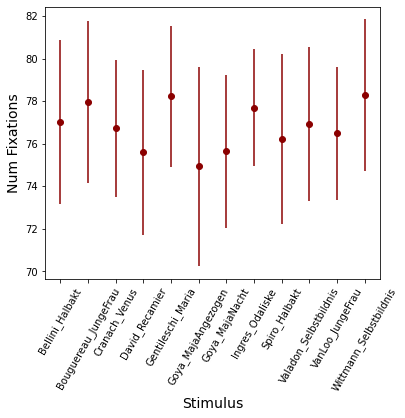

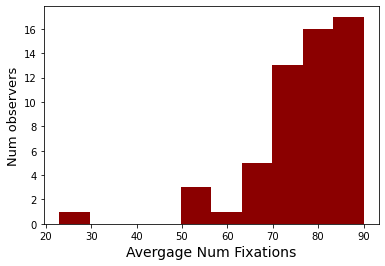

In [181]:
MyGenderDat.RunDescriptiveFix(Visual=1,duration=0)

Data for  45 observers and  48  stimuli.
Mean fixation number:  15.65  +/-  2.08
Mean fixation duration:  316.5  +/-  31.7 msec
Num of trials with zero fixations: 8
Num valid trials  2152
Mean X location:  648.5  +/-  30.1  pixels
Mean Y location:  468.0  +/-  30.0  pixels


(array([  5.,  17.,  19.,  20.,  22.,  27.,  28.,  29.,  30.,  43.,  45.,
         46., 101., 103., 107., 113., 114., 129., 131., 133., 135., 146.,
        148., 156., 202., 203., 209., 218., 219., 231., 243., 244., 250.,
        252., 255., 262., 304., 305., 306., 307., 329., 330., 331., 332.,
        354., 355., 356., 357.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41., 42., 43., 44., 45.]))

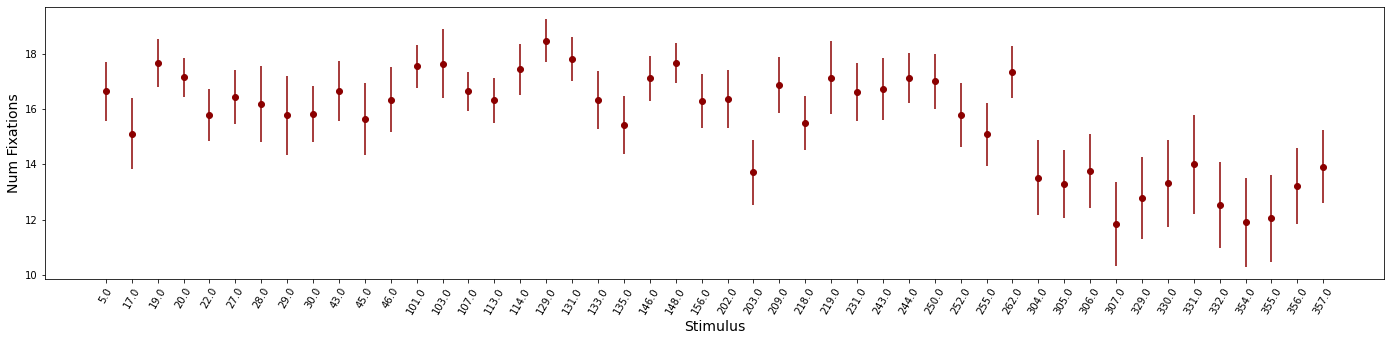

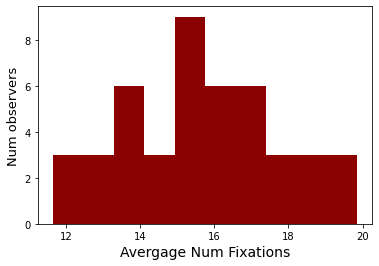

In [183]:
MyMemoryDat.RunDescriptiveFix(Visual=1,duration=1)

### access descripitve stastics as attributes:

c:\users\aratoj87\documents\github\pyeyesim\PyEyeSim\pyeyesim.py:196: RuntimeWarning: Mean of empty slice
  Y=np.nanmean(np.nanmean(self.durprog,1),0)
c:\users\aratoj87\documents\github\pyeyesim\PyEyeSim\pyeyesim.py:197: RuntimeWarning: Mean of empty slice
  Err=stats.sem(np.nanmean(self.durprog,1),axis=0,nan_policy='omit')


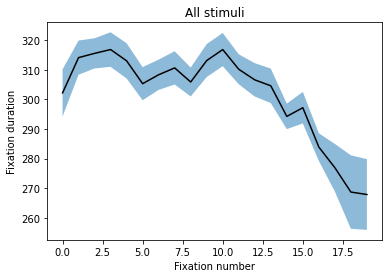

In [185]:
MyMemoryDat.FixDurProg(20)

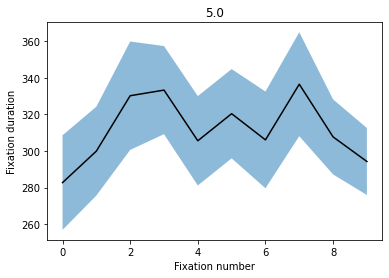

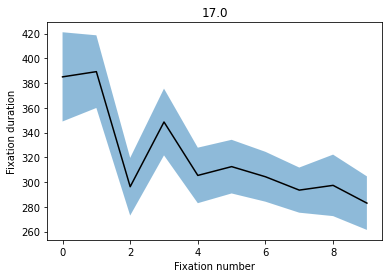

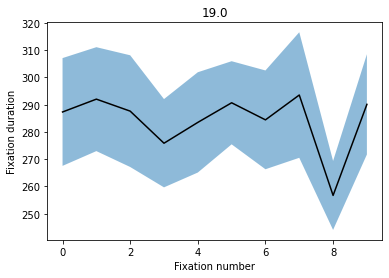

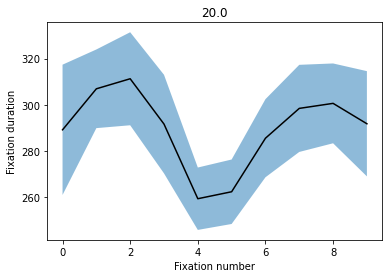

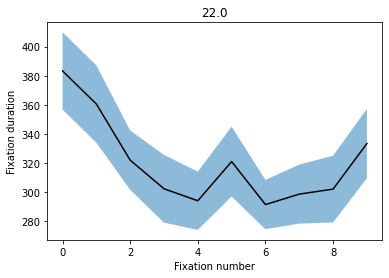

In [169]:
for stim in MyDat.stimuli[0:5]:
    MyDat.FixDurProg(10,Stim=stim)
   

In [100]:
MyDat.durations

array([[272.52631579, 314.35294118, 272.63157895, ..., 365.29411765,
        281.05263158, 287.22222222],
       [246.125     , 412.        , 245.5       , ..., 356.22222222,
        274.        , 321.28571429],
       [281.68421053, 325.625     , 230.09090909, ..., 494.66666667,
        436.6       , 556.        ],
       ...,
       [313.05882353, 395.69230769, 480.33333333, ..., 558.        ,
        431.4       , 424.33333333],
       [247.71428571, 278.94736842, 289.        , ..., 327.125     ,
        308.23529412, 315.        ],
       [276.11111111, 294.        , 326.26666667, ..., 315.625     ,
        336.93333333, 319.375     ]])

In [68]:
dir(MyDat)

['BinnedCount',
 'CompareGroupsFix',
 'CompareGroupsHeatMap',
 'DataInfo',
 'Entropy',
 'FixCountCalc',
 'GetDurations',
 'GetEntropies',
 'GetFixationData',
 'GetGroups',
 'GetParams',
 'GetStimuli',
 'Heatmap',
 'InferSize',
 'RunDescriptiveFix',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'data',
 'design',
 'images',
 'info',
 'name',
 'np',
 'ns',
 'stimuli',
 'subjects',
 'x_size',
 'y_size']

### run group comparison

Conditions ['Female' 'Male']
Calculating entropy
0 Bellini_Halbakt 5.65 maximum entropy 6.93
1 Bouguereau_JungeFrau 5.09 maximum entropy 5.97
2 Cranach_Venus 5.24 maximum entropy 6.27
3 David_Recamier 5.62 maximum entropy 6.93
4 Gentileschi_Maria 5.91 maximum entropy 6.97


C:\Users\aratoj87\AppData\Local\Continuum\anaconda3\envs\tf\lib\site-packages\scipy\stats\_entropy.py:72: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


5 Goya_MajaAngezogen 5.51 maximum entropy 7.0
6 Goya_MajaNacht 5.5 maximum entropy 6.9
7 Ingres_Odaliske 6.12 maximum entropy 7.15
8 Spiro_Halbakt 5.47 maximum entropy 6.41
9 Valadon_Selbstbildnis 5.92 maximum entropy 7.12
10 VanLoo_JungeFrau 5.57 maximum entropy 6.34
11 Wittmann_Selbstbildnis 5.47 maximum entropy 6.38
0 Female Num fix=  77.39 +/- 13.25
0 Female Entropy=  3.67 +/- 0.24
1 Male Num fix=  76.26 +/- 9.41
1 Male Entropy=  3.65 +/- 0.16


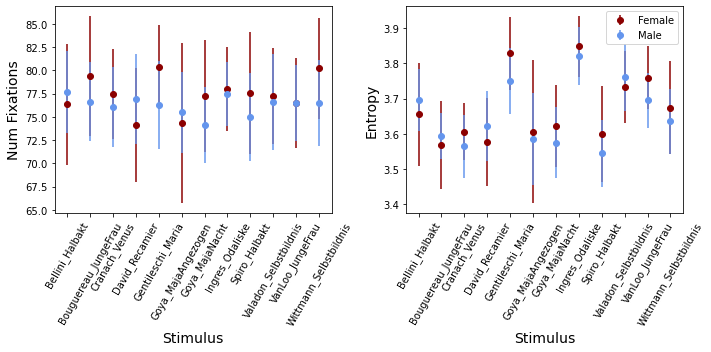

In [186]:
MyGenderDat.CompareGroupsFix('PartGend')

## print availible methods and attributes

uppercase letter for methods.
lowercase for data attributes


In [187]:
dir(MyGenderDat) 

['BinnedCount',
 'CompareGroupsFix',
 'CompareGroupsHeatMap',
 'Conds',
 'DataInfo',
 'Entropy',
 'FixCountCalc',
 'FixDurProg',
 'GetDurations',
 'GetEntropies',
 'GetFixationData',
 'GetGroups',
 'GetParams',
 'GetStimuli',
 'Heatmap',
 'InferSize',
 'RunDescriptiveFix',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'bounds',
 'boundsX',
 'boundsY',
 'data',
 'design',
 'durations',
 'entropies',
 'entropies_ind',
 'entropmax',
 'images',
 'info',
 'meanfix_xy',
 'name',
 'nfix',
 'nfixations',
 'np',
 'ns',
 'sdfix_xy',
 'stimuli',
 'subjects',
 'x_size',
 'y_size']

In [109]:
for i in range(5):
    print(MyDat.nfixations[:,i])

[19. 16. 19. 16. 18. 14. 16. 12.  7. 15.  6. 15. 18. 16. 25. 17. 16. 18.
 20. 20. 18. 13. 19. 21. 16. 12. 16. 20. 20. 16. 15. 14. 20. 18. 17. 16.
 16. 16. 16. 22. 10. 19. 17. 21. 18.]
[17.  4. 16. 20. 17. 19. 15. 12. 14. 13. 17.  8. 18. 13. 14. 12. 11. 17.
 21. 11. 16. 16. 17. 19. 15.  7. 19. 16. 11. 17. 18. 17. 18. 17. 10. 17.
  9. 19.  3. 23. 19. 19. 13. 19. 17.]
[19. 20. 22. 23. 18. 18. 16. 20. 18. 20. 17. 17. 16. 14. 23. 15. 16. 21.
 16. 19. 18. 17. 17. 23. 18. 16. 17. 12. 19. 18. 19. 15. 18. 20. 20. 18.
 10. 17. 14. 21. 14. 21. 12. 18. 15.]
[17. 18. 18. 21. 16. 13. 15. 16. 15. 14. 20. 16. 15. 17. 19. 15. 20. 22.
 16. 16. 20. 19. 18. 19. 18. 19. 14. 17. 18. 18. 18. 17. 15. 20. 15. 18.
 16. 15. 17. 20. 10. 21. 15. 18. 18.]
[18. 14. 17. 21. 19.  9. 15. 14.  9. 14. 17. 17. 15. 14. 19. 14. 15. 18.
 13. 15. 18. 17. 15. 21. 14. 12. 15. 18. 17. 15. 19. 16. 18. 14. 16. 16.
 18. 17. 13. 14.  7. 20. 11. 21. 21.]


## accessing data as xarray attributes
the advantage of xarray is named coordinates, that can also be indexed as a numpy array:


NFix.sel(subjectID='G_001',Painting='Spiro_Halbakt') 

NFix[0,8]

should give the same result


In [20]:
MyDat.NFix.sel(Stimulus='Spiro_Halbakt')

<xarray.DataArray (subjectID: 56)>
array([ 82.,  78.,  70., 100.,  62.,  75.,  87.,  88.,  82.,  80.,  71.,
        65.,  83.,  81.,  68.,  65.,  74.,  94.,  85.,  79.,  75.,  77.,
        82.,  78.,  78.,  79.,  80.,  92.,  82.,  84.,  62.,  12.,  73.,
        60.,  97.,  85.,  88.,  74.,  88.,  72.,  90.,  72.,  84.,  89.,
        99.,  92.,  40.,  92.,  69.,  48.,  81.,  64.,  73.,  60.,  57.,
        71.])
Coordinates:
  * subjectID  (subjectID) object 'G_001' 'G_002' 'G_003' ... 'P85_VF' 'P87_VF'
    Stimulus   <U13 'Spiro_Halbakt'

In [21]:
MyDat.NFix.sel(subjectID='G_001') 

<xarray.DataArray (Stimulus: 12)>
array([81., 79., 87., 75., 70., 80., 79., 80., 82., 73., 78., 80.])
Coordinates:
    subjectID  <U5 'G_001'
  * Stimulus   (Stimulus) object 'Bellini_Halbakt' ... 'Wittmann_Selbstbildnis'

## Saliency map for a given stimulus

SD parameter: smoothness in pixels

Vis parameter: whether plot shows up

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

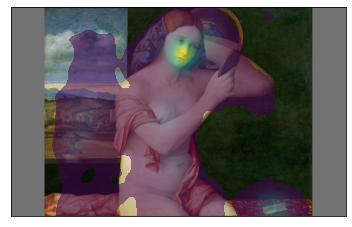

In [188]:
MyGenderDat.Heatmap('Bellini_Halbakt',SD=50,Vis=1)

### Saliency map comparison

Conditions ['Female' 'Male']


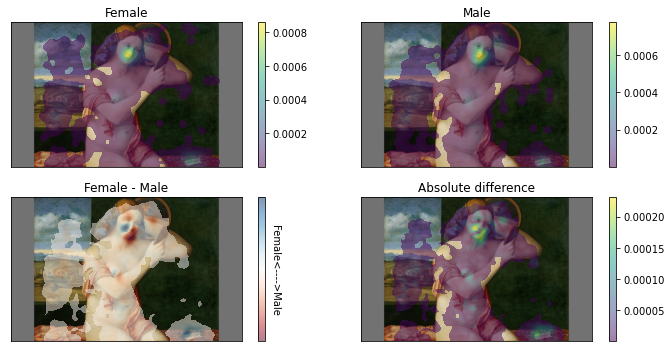

In [195]:
MyGenderDat.CompareGroupsHeatMap(Stim='Bellini_Halbakt',betwcond='PartGend',SD=30)

Conditions ['Female' 'Male']


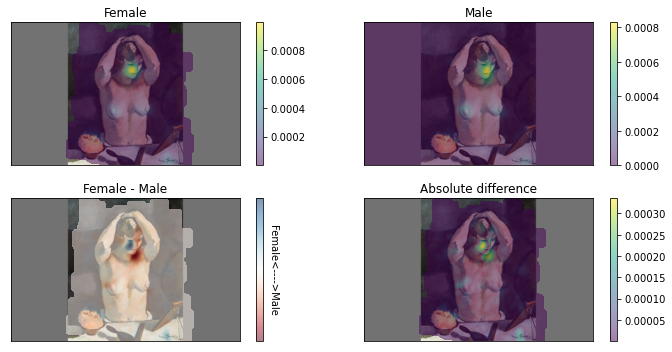

In [37]:
MyDat.CompareGroupsHeatMap(Stim='Spiro_Halbakt',betwcond='PartGend',SD=30)

In [193]:
hasattr(MyGenderDat,'Stims')

False

## old code
## Saliency map and entropy for multiple stimuli
### (slow)

todo: use only area with fixations for saliency map calculation

0 Bellini_Halbakt 415 2150 109 1639
0 Bellini_Halbakt entropy: 4.42 relative entropy 0.8
1 Bouguereau_JungeFrau 905 1630 151 1569
1 Bouguereau_JungeFrau entropy: 3.82 relative entropy 0.83
2 Cranach_Venus 874 1762 97 1662
2 Cranach_Venus entropy: 3.94 relative entropy 0.82
3 David_Recamier 267 2184 159 1510
3 David_Recamier entropy: 4.4 relative entropy 0.8
4 Gentileschi_Maria 374 2298 111 1558
4 Gentileschi_Maria entropy: 4.7 relative entropy 0.84
5 Goya_MajaAngezogen 197 2440 268 1522
5 Goya_MajaAngezogen entropy: 4.28 relative entropy 0.77
6 Goya_MajaNacht 166 2451 316 1435
6 Goya_MajaNacht entropy: 4.25 relative entropy 0.77
7 Ingres_Odaliske 123 2578 206 1540
7 Ingres_Odaliske entropy: 4.9 relative entropy 0.85
8 Spiro_Halbakt 814 1879 209 1673
8 Spiro_Halbakt entropy: 4.18 relative entropy 0.84
9 Valadon_Selbstbildnis 245 2254 103 1681
9 Valadon_Selbstbildnis entropy: 4.72 relative entropy 0.83
10 VanLoo_JungeFrau 735 1832 224 1583
10 VanLoo_JungeFrau entropy: 4.24 relative entro

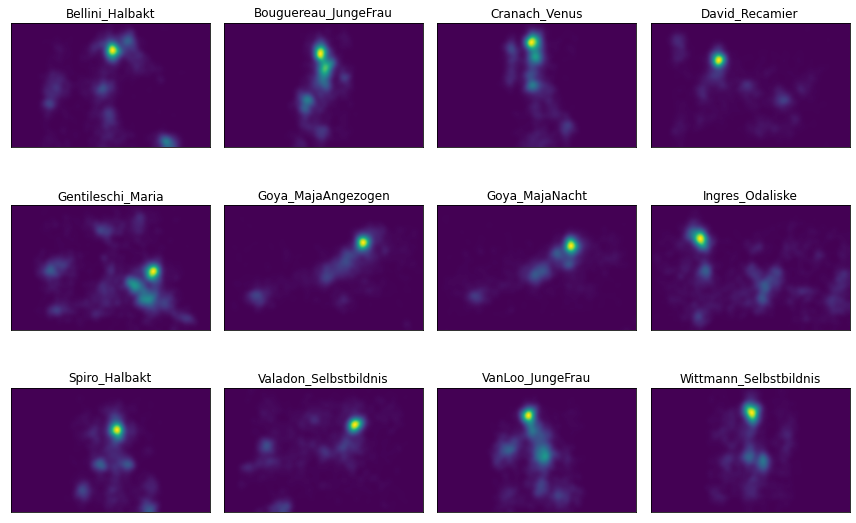

In [120]:
plt.figure(figsize=(12,8))
for cs,stim in enumerate(Stimuli):
    plt.subplot(3,4,cs+1)
    smap=pysim.SaliencyMap(FixDataPrep,stim,sizeX,sizeY,Ind=0,SD=35,Vis=1)
   # pysim.SaliencyPlot(smap,newfig=0)
    
    Fixcount=pysim.FixCountCalc(FixDataPrep,stim,sizeX,sizeY)
    Fixcount=np.sum(Fixcount,0)
    x1=int(Bounds['BoundX1'][Bounds['Stimulus']==stim])
    x2=int(Bounds['BoundX2'][Bounds['Stimulus']==stim])
    y1=int(Bounds['BoundY1'][Bounds['Stimulus']==stim])
    y2=int(Bounds['BoundY2'][Bounds['Stimulus']==stim])
    print(cs,stim,x1,x2,y1,y2)
    BinnedC=pysim.BinnedCount(Fixcount,x2,y2,x_size_start=x1,y_size_start=y1,binsize_h=100,binsize_v=100)
    plt.xticks([])
    plt.yticks([])
    Entr,RelativeEntr=pysim.Entropy(BinnedC)
    print(cs,stim,'entropy:',np.round(Entr,2),'relative entropy',np.round(RelativeEntr,2))
    plt.title(stim) 
plt.tight_layout()
    

0 5.0 75 1209 47 919
0 5.0 entropy: 3.83 relative entropy 0.86
1 17.0 59 1213 54 940
1 17.0 entropy: 3.68 relative entropy 0.82
2 19.0 65 1230 5 960
2 19.0 entropy: 4.34 relative entropy 0.94
3 20.0 74 1281 56 1120
3 20.0 entropy: 4.17 relative entropy 0.87
4 22.0 32 1278 10 946
4 22.0 entropy: 4.15 relative entropy 0.89
5 27.0 129 1166 -4 1012
5 27.0 entropy: 3.83 relative entropy 0.83
6 28.0 58 1226 122 1046
6 28.0 entropy: 4.13 relative entropy 0.9
7 29.0 38 1263 5 991
7 29.0 entropy: 4.25 relative entropy 0.91


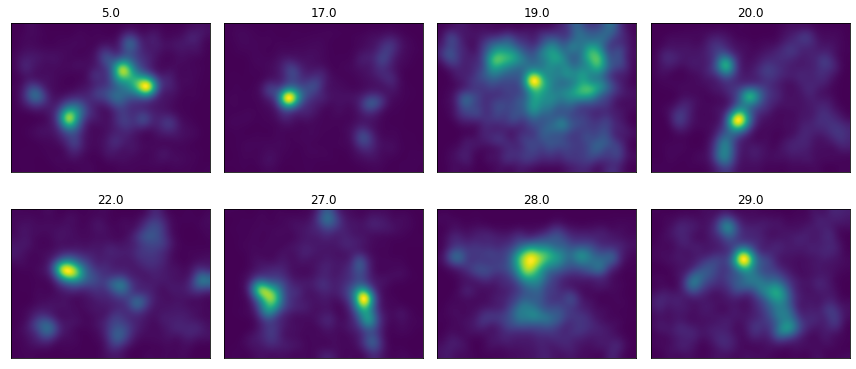

In [34]:
plt.figure(figsize=(12,8))
for cs,stim in enumerate(Stimuli[0:8]):
    plt.subplot(3,4,cs+1)
    smap=pysim.Heatmap(FixDataPrep,stim,sizeX,sizeY,Ind=0,SD=35,Vis=1)
   # pysim.SaliencyPlot(smap,newfig=0)
    
    Fixcount=pysim.FixCountCalc(FixDataPrep,stim,sizeX,sizeY)
    Fixcount=np.sum(Fixcount,0)
    x1=int(Bounds['BoundX1'][Bounds['Stimulus']==stim])
    x2=int(Bounds['BoundX2'][Bounds['Stimulus']==stim])
    y1=int(Bounds['BoundY1'][Bounds['Stimulus']==stim])
    y2=int(Bounds['BoundY2'][Bounds['Stimulus']==stim])
    print(cs,stim,x1,x2,y1,y2)
    BinnedC=pysim.BinnedCount(Fixcount,x2,y2,x_size_start=x1,y_size_start=y1,binsize_h=100,binsize_v=100)
    plt.xticks([])
    plt.yticks([])
    Entr,RelativeEntr=pysim.Entropy(BinnedC)
    print(cs,stim,'entropy:',np.round(Entr,2),'relative entropy',np.round(RelativeEntr,2))
    plt.title(stim) 
plt.tight_layout()
    

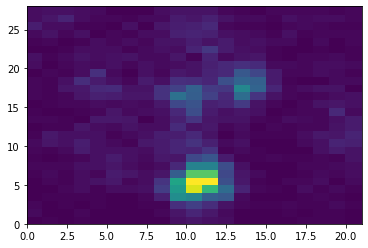

In [119]:
plt.pcolor(BinnedC)
